```
[Title] CP, CPK
[Author] Yibeck Lee(yibec.Lee@gmail.com)
[Contents] 
 - Python Version : CP, CPK
[Reference]
 - https://matplotlib.org/3.1.0/gallery/statistics/histogram_features.html
 - https://gist.github.com/countrymarmot/8413981
```

In [12]:
#!/c/Apps/Anaconda3/python
# -*- coding: utf-8 -*-

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def Cp(values, usl, lsl):
    arr = np.array(values)
    arr = arr.ravel()
    sigma = np.std(arr)
    Cp = float(usl - lsl) / (6*sigma)
    return Cp


def Cpk(values, usl, lsl):
    arr = np.array(values)
    arr = arr.ravel()
    sigma = np.std(arr)
    m = np.mean(arr)

    Cpu = float(usl - m) / (3*sigma)
    Cpl = float(m - lsl) / (3*sigma)
    Cpk = np.min([Cpu, Cpl])
    return Cpk

CP =  1.751658990574456
CPK =  1.1465471690799736


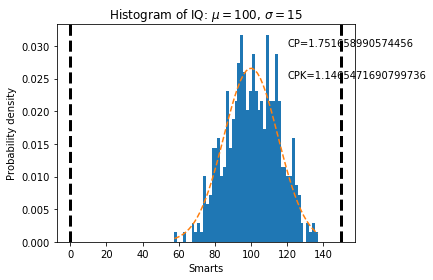

In [13]:
if __name__ == "__main__":
    # example data
    mu = 100  # mean of distribution
    sigma = 15  # standard deviation of distribution
    x = mu + sigma * np.random.randn(437)
    LSL = 0
    USL = 150
    CP = Cp(values=x, usl=USL, lsl=LSL)
    print('CP = ', CP)
    CPK = Cpk(values=x, usl=USL, lsl=LSL)
    print('CPK = ', CPK)


    num_bins = 50

    fig, ax = plt.subplots()

    # the histogram of the data
    n, bins, patches = ax.hist(x, num_bins, density=1)

    # add a 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--')
    ax.set_xlabel('Smarts')
    ax.set_ylabel('Probability density')
    ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')
    ax.axvline(LSL, color='k', linestyle='dashed', linewidth=3)
    ax.axvline(USL, color='k', linestyle='dashed', linewidth=3)
    ax.text(120, .03, r'CP={}'.format(CP))
    ax.text(120, .025, r'CPK={}'.format(CPK))
    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()


In [14]:
df = pd.read_csv("WIP_HISTORY.csv")
df.describe()

,TARGET_VALUE,GOOD_BAD,LINE,EQUIPMENT,GAS_PRESSURE,TEMPERATURE,THICKNESS,WAITING_TIME,PROCESS_TIME,INTENSITY,RPM,TIME_GAP,SPEED
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,78608.479900,0.27900,2.093900,2.722100,161.390900,10969.032300,1116.047400,972.684900,6856.017000,209.133800,2.169256e+07,56726.908600,9276.525900
std,4922.822724,0.44853,0.823863,1.061218,117.888214,596.853361,181.952017,109.460993,5193.419096,114.503217,3.110938e+07,71945.939391,355.952968
min,59562.000000,0.00000,1.000000,1.000000,0.000000,9747.000000,669.000000,745.000000,0.000000,36.000000,1.001700e+04,0.000000,8178.000000
25%,75400.000000,0.00000,1.000000,2.000000,57.000000,10461.750000,989.000000,871.000000,2744.000000,95.000000,7.926850e+04,67.000000,9031.000000
50%,78664.000000,0.00000,2.000000,3.000000,132.000000,10967.000000,1115.000000,1018.000000,5791.500000,208.000000,2.037095e+05,18872.000000,9274.000000
75%,82013.250000,1.00000,3.000000,4.000000,272.250000,11468.250000,1247.000000,1053.000000,9437.500000,322.000000,4.187183e+07,100407.500000,9554.000000
max,93186.000000,1.00000,3.000000,4.000000,454.000000,12235.000000,1499.000000,1173.000000,24861.000000,378.000000,1.000037e+08,254234.000000,9999.000000


161.3909 117.88231969718784 0 500
CP =  0.7069196937029846
CPK =  0.456361622377796


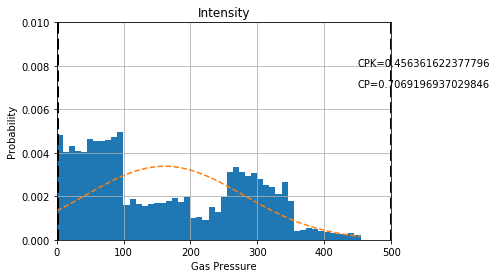

In [15]:
if __name__ == "__main__":
    PARAMETER_VALUES = df['GAS_PRESSURE'].tolist()
    PARAMETER_LABEL = 'Gas Pressure'
    mu = np.average(PARAMETER_VALUES)
    sigma = np.std(PARAMETER_VALUES)
    LSL = 0
    USL = 500
    print(mu,sigma, LSL, USL)
    n, bins, patches = plt.hist(PARAMETER_VALUES, 50, density=True)
    CP = Cp(values=PARAMETER_VALUES, usl=USL, lsl=LSL)
    print('CP = ', CP)
    CPK = Cpk(values=PARAMETER_VALUES, usl=USL, lsl=LSL)
    print('CPK = ', CPK)
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))


    plt.xlabel(PARAMETER_LABEL)
    plt.ylabel('Probability')
    plt.title('Intensity')
    plt.axvline(LSL, color='k', linestyle='dashed', linewidth=3)
    plt.axvline(USL, color='k', linestyle='dashed', linewidth=3)
    plt.text(450, .007, r'CP={}'.format(CP))
    plt.text(450, .008, r'CPK={}'.format(CPK))
    plt.axis([0, 500, 0, 0.01])
    plt.grid(True) # True or False
    plt.plot(bins, y, '--') 
    fig.tight_layout()
    plt.show()
